# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Fall 2021
- Instructor: Greg Ryslik
- Section: Wednesday/Friday 12:45PM 
- Student Name: Bo Yang
- Student Email: yang.6113@osu.edu
- Student ID: 500594333

Template Version V4.
***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.
***

# Introduction

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
1.	Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
2.	Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

- The file **small_Xydf.csv** is a two-dimensional dataset with 200 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large1_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large2_Xydf.csv** is another two-dimensional dataset with 3000 records, and characteristics different from the “large1” dataset.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you should work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams!

### What you need to turn in:

1.	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2.	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading:

1.	Overall readability and organization of your report (10%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
2.	Evaluation of the KNN Clustering Algorithm on the Small Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3.	Evaluation of the KNN Clustering Algorithm on the Large1 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4.	Evaluation of the KNN Clustering Algorithm on the Large2 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5.	Evaluation of the Second Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
6.	Evaluation of the Third Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
7.	Comparison of the Three Clustering Algorithms (10%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
8.	Conclusions (5%) – Did you document your overall insights? 

### How to turn in your work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit to Carmen any code that you used to process and analyze this data. You do not need to include the input data.  All the related files (code and/or report) except for the data should be archived in a **zip file (with no folder trees inside)** and submitted via Carmen.  The submitted file should be less than 5MB.  Use this naming convention: **HomeworkN_Surname_DotNumber.zip**

### References and Acknowledgements:

1.	https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2.	https://scikit-learn.org/stable/modules/clustering.html
3.	https://docs.python.org/3/library/time.html
4.	https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5.	https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

### 
>This exercise is mainly for me to master the realization and parameter selection of a variety of clustering methods. At the same time, through this exercise, I need to master the evaluation method of clustering effect and visualization.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

### Read and visualize data from Small Dataset

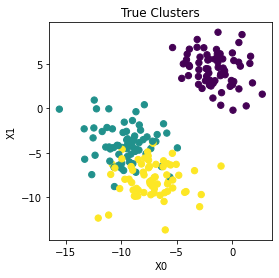

<Figure size 432x288 with 0 Axes>

In [2]:
def plot_clusters(title, X, y, size):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(size,size))
    plt.title(title)
    plt.xlabel("X0") 
    plt.ylabel("X1")
    plt.scatter(X[:, 0], X[:, 1], s = 40, c = y[:]) 
    plt.show()
    plt.clf()
    
small_data = pd.read_csv('small_Xydf.csv')
X=small_data.iloc[:,1:3]
true_y=small_data['y']
x = small_data[['X0','X1']].to_numpy()
y = small_data['y'].to_numpy()
plot_clusters("True Clusters", x, y, 4)

### Calculate y_count

In [3]:
def y_count(y):
    count=np.bincount(y)
    label=np.unique(y)
    y_count=dict(zip(label,count))
    return y_count
y_true_count=y_count(true_y)
y_true_count

{0: 67, 1: 67, 2: 66}

### Define WSS and calculate True WSS

In [4]:
def wss(X,y,y_count):
    centroid_X0=np.zeros(len(y_count))
    centroid_X1=np.zeros(len(y_count))
    
    #calculate Mi(x) and Mi(y)
    for i in range(len(y)):
        for j in range(len(y_count)):
            if y[i]==list(y_count.keys())[j]:
                centroid_X0[j]+=X['X0'][i]
                centroid_X1[j]+=X['X1'][i]
    for i in range(len(y_count)):
        centroid_X0[i]/=(list(y_count.values())[i])
        centroid_X1[i]/=(list(y_count.values())[i])
    
    #calculate the sum of (X-Mi)^2=sum of (X(x)-Mi(x))^2+(X(y)-Mi(y))^2
    WSS_X0=0
    WSS_X1=0
    for i in range(len(y)):
        for j in range(len(y_count)):
            if y[i]==list(y_count.keys())[j]:
                WSS_X0+=pow((X['X0'][i]-centroid_X0[j]),2)
                WSS_X1+=pow((X['X1'][i]-centroid_X1[j]),2)
    WSS=WSS_X0+WSS_X1
    
    return WSS

True_WSS=wss(X,true_y,y_true_count)
True_WSS

1506.532187125321

### Define BSS and calculate True BSS

In [5]:
def bss(X,y,y_count):
    mean=np.mean(X)
    label=list(y_count.keys())
    # Ci is the size of cluster i
    size_cluster=list(y_count.values())
    centroid_X0=np.zeros(len(y_count))
    centroid_X1=np.zeros(len(y_count))
    
    #calculate Mi(x) and Mi(y)
    for i in range(len(y)):
        for j in range(len(y_count)):
            if y[i]==label[j]:
                centroid_X0[j]+=X['X0'][i]
                centroid_X1[j]+=X['X1'][i]
    for i in range(len(y_count)):
        centroid_X0[i]/=(size_cluster[i])
        centroid_X1[i]/=(size_cluster[i])
    
    #calculate the sum of Ci*(M-Mi)^2=sum of Ci*(M(x)-Mi(x))^2+Ci*(M(y)-Mi(y))^2
    BSS_X0=0
    BSS_X1=0
    for i in range(len(y_count)):     
        BSS_X0+=size_cluster[i]*pow((centroid_X0[i]-mean[0]),2)
        BSS_X1+=size_cluster[i]*pow((centroid_X1[i]-mean[1]),2)
    BSS=BSS_X0+BSS_X1
    
    return BSS

True_BSS=bss(X,true_y,y_true_count)
True_BSS

7652.282873956177

### Define Total SSE

In [6]:
def total_sse(WSS,BSS):
    return WSS+BSS

True_Total_SSE=total_sse(True_WSS,True_BSS)
True_Total_SSE

9158.8150610815

***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

K=  2  WSS=  2222.1849614332114  BSS=  6936.630099648288  SSE=  9158.8150610815  Time=  0.026914000000000105
K=  3  WSS=  1368.7518425244439  BSS=  7790.063218557056  SSE=  9158.8150610815  Time=  0.030925000000000313
K=  4  WSS=  1171.0926895896177  BSS=  7987.722371491885  SSE=  9158.815061081503  Time=  0.03801200000000016


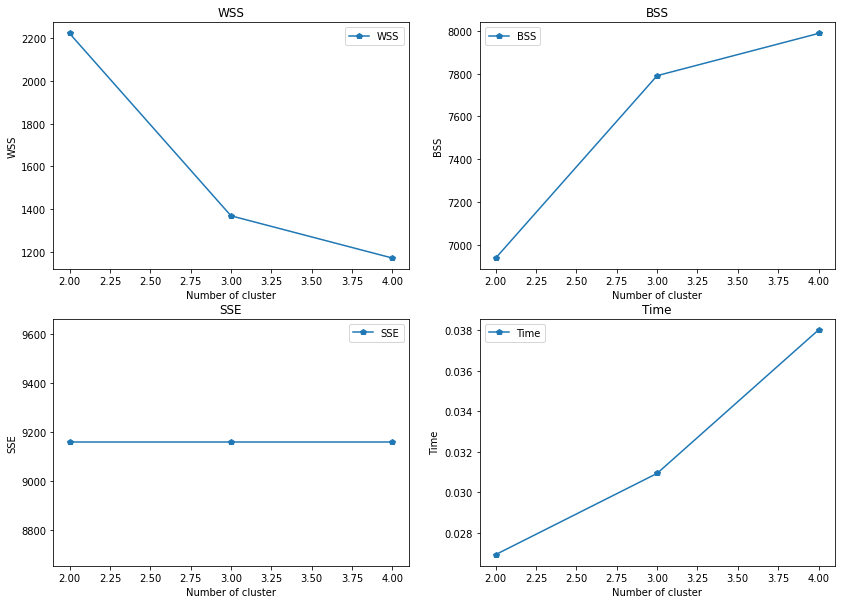

In [7]:
from time import process_time
#Set K=2, 3, 4.
range_n_clusters = [2, 3, 4]
# record WSS for every value of K
Pred_WSS = []
# record BSS for every value of K
Pred_BSS = []
# record SSE for every value of K
Pred_SSE = []
# record running time for every value of K
Time=[]

for n_clusters in range_n_clusters:
   start= process_time() 
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   end=process_time() 
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
   #calculate BSS
   pred_bss=bss(X,y_pred,y_pred_count)
   Pred_BSS.append(pred_bss)
   #calculate SSE
   pred_sse=total_sse(pred_wss,pred_bss)
   Pred_SSE.append(pred_sse)
   #calculate running time
   pred_time=end-start
   Time.append(pred_time)
   #print WSS,BSS,SSE,Time
   print("K= ",n_clusters," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)
#Add visual
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
fig.add_subplot(222)
plt.plot(range_n_clusters, Pred_BSS,'p-',label='BSS')
plt.xlabel("Number of cluster")
plt.ylabel("BSS")
plt.title("BSS")
plt.legend()
fig.add_subplot(223)
plt.plot(range_n_clusters, Pred_SSE,'p-',label='SSE')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("SSE")
plt.legend()
fig.add_subplot(224)
plt.plot(range_n_clusters, Time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

***
## Section: 1.3 - For the K=3 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

### Create scatterplots for true cluster and the cluster produced by my algorithm

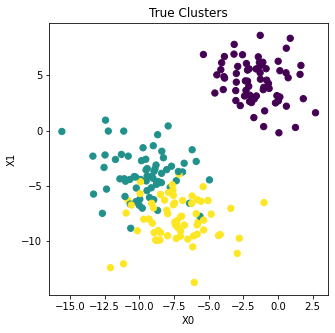

<Figure size 432x288 with 0 Axes>

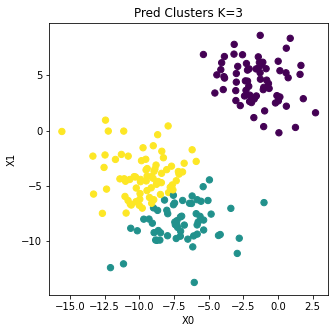

<Figure size 432x288 with 0 Axes>

In [8]:
clusterer = KMeans(n_clusters = 3, random_state=42)
y_pred = clusterer.fit_predict(X)
plot_clusters("True Clusters", x, y, 5)
plot_clusters("Pred Clusters K=3", x, y_pred, 5)

### Create a cross tabulation matrix comparing the true and assigned clusters
>- https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels)

In [9]:
from sklearn.metrics import confusion_matrix
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    #assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1[i] == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2[j] == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)

def calculate_cost_matrix(C, n_clusters):
    cost_matrix = np.zeros((n_clusters, n_clusters))

    # cost_matrix[i,j] will be the cost of assigning cluster i to label j
    for j in range(n_clusters):
        s = np.sum(C[:,j]) # number of examples in cluster i
        for i in range(n_clusters):
            t = C[i,j]
            cost_matrix[j,i] = s-t
    return cost_matrix

def tabulation_matrix(y_true,y_pred):
    """entry point"""
    
    num_labels = len(np.unique(y_true))
    n_clusters = len(np.unique(y_pred))
    
    cm = confusion_matrix(y_true, y_pred, labels=range(num_labels)) # gets the confusion matrix
    print ("---------------------\nold confusion matrix:\n" \
          " %s\naccuracy: %.2f" % (str(cm), accuracy(cm)))

    #cost_matrix = make_cost_matrix(y_pred, y_true)
    cost_matrix = calculate_cost_matrix(cm, num_labels)
    print('cost matrix:\n',cost_matrix)

    m = Munkres()
    indexes = m.compute(cost_matrix)
    print('index:',indexes)
    mapper = { old: new for (old, new) in indexes }

    print ("---------------------\nmapping:")
    for old, new in mapper.items():
        print ("map: %s --> %s" %(old, new))

    new_labels = translate_clustering(y_pred, mapper)
   
    
    new_cm = confusion_matrix(y_true, new_labels, labels=range(num_labels))
    print ("---------------------\nnew confusion matrix:\n" \
          " %s\naccuracy: %.2f" % (str(new_cm), accuracy(new_cm)))
    
tabulation_matrix(y,y_pred)

---------------------
old confusion matrix:
 [[67  0  0]
 [ 0  5 62]
 [ 0 55 11]]
accuracy: 0.41
cost matrix:
 [[ 0. 67. 67.]
 [60. 55.  5.]
 [73. 11. 62.]]
index: [(0, 0), (1, 2), (2, 1)]
---------------------
mapping:
map: 0 --> 0
map: 1 --> 2
map: 2 --> 1
---------------------
new confusion matrix:
 [[67  0  0]
 [ 0 62  5]
 [ 0 11 55]]
accuracy: 0.92


### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [10]:
from sklearn.metrics import classification_report
classification_report(y, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        67\n           1       0.08      0.07      0.08        67\n           2       0.15      0.17      0.16        66\n\n    accuracy                           0.41       200\n   macro avg       0.41      0.41      0.41       200\nweighted avg       0.41      0.41      0.41       200\n'

***
## Section: 1.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

### Observation:
>- Total SSE is a contant.
>- The larger the K, the longer the program will run.
>- The larger K is, the smaller WSS is.

### K=3 is best
When K is at 3, WSS produces an inflection point.

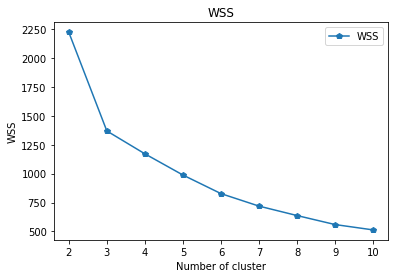

In [11]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
  
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

### Read and visualize data from Large1 Dataset

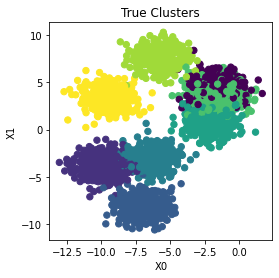

<Figure size 432x288 with 0 Axes>

In [12]:
L1_data = pd.read_csv('large1_Xydf.csv')
X=L1_data.iloc[:,1:3]
true_y=L1_data['y']
x = L1_data[['X0','X1']].to_numpy()
y = L1_data['y'].to_numpy()
plot_clusters("True Clusters", x, y, 4)

### Calculate y_count

In [13]:
y_true_count=y_count(true_y)
y_true_count

{0: 375, 1: 375, 2: 375, 3: 375, 4: 375, 5: 375, 6: 375, 7: 375}

### Calculate True WSS

In [14]:
True_WSS=wss(X,true_y,y_true_count)
True_WSS

5997.740497490684

### Calculate True BSS

In [15]:
True_BSS=bss(X,true_y,y_true_count)
True_BSS

102021.45302435581

### Calculate True Total SSE

In [16]:
True_Total_SSE=total_sse(True_WSS,True_BSS)
True_Total_SSE

108019.1935218465

***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

K=  6  WSS=  8332.8320483774  BSS=  99686.3614734691  SSE=  108019.1935218465  Time=  0.26440600000000014
K=  8  WSS=  5225.833962446452  BSS=  102793.35955940004  SSE=  108019.1935218465  Time=  0.4246250000000007
K=  10  WSS=  4618.114073335133  BSS=  103401.07944851136  SSE=  108019.1935218465  Time=  0.518281


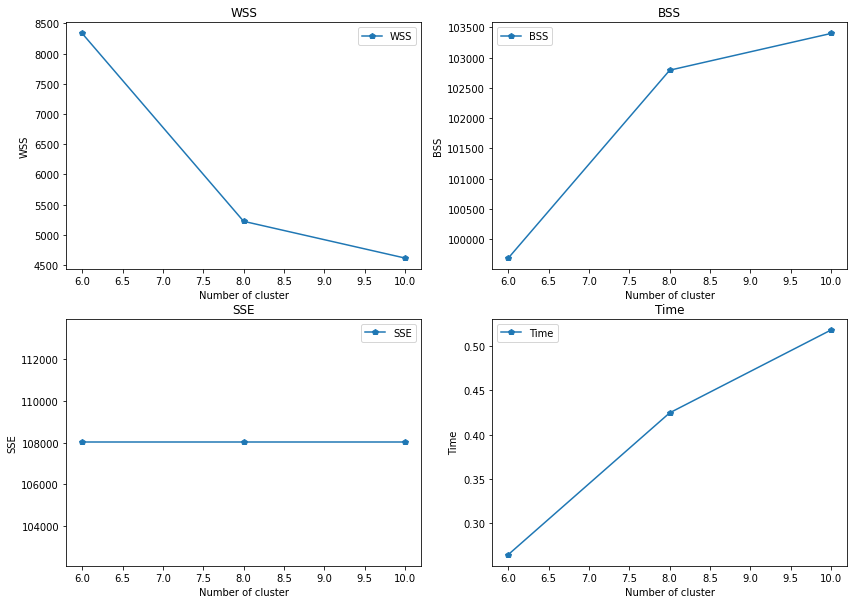

In [17]:
#Set K=6, 8, 10.
range_n_clusters = [6, 8, 10]
# record WSS for every value of K
Pred_WSS = []
# record BSS for every value of K
Pred_BSS = []
# record SSE for every value of K
Pred_SSE = []
# record running time for every value of K
Time=[]

for n_clusters in range_n_clusters:
   start= process_time() 
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   end=process_time() 
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
   #calculate BSS
   pred_bss=bss(X,y_pred,y_pred_count)
   Pred_BSS.append(pred_bss)
   #calculate SSE
   pred_sse=total_sse(pred_wss,pred_bss)
   Pred_SSE.append(pred_sse)
   #calculate running time
   pred_time=end-start
   Time.append(pred_time)
   #print WSS,BSS,SSE,Time
   print("K= ",n_clusters," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)
#Add visual
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
fig.add_subplot(222)
plt.plot(range_n_clusters, Pred_BSS,'p-',label='BSS')
plt.xlabel("Number of cluster")
plt.ylabel("BSS")
plt.title("BSS")
plt.legend()
fig.add_subplot(223)
plt.plot(range_n_clusters, Pred_SSE,'p-',label='SSE')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("SSE")
plt.legend()
fig.add_subplot(224)
plt.plot(range_n_clusters, Time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

***
## Section: 2.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

### Create scatterplots for true cluster and the cluster produced by my algorithm

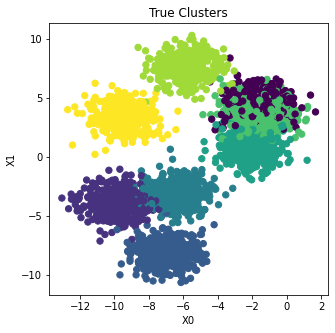

<Figure size 432x288 with 0 Axes>

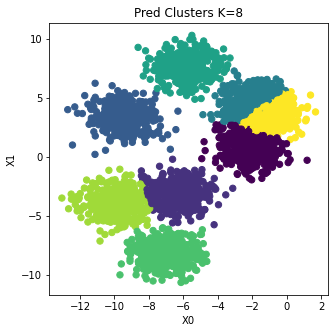

<Figure size 432x288 with 0 Axes>

In [18]:
clusterer = KMeans(n_clusters = 8, random_state=42)
y_pred = clusterer.fit_predict(X)
plot_clusters("True Clusters", x, y, 5)
plot_clusters("Pred Clusters K=8", x, y_pred, 5)

### Create a cross tabulation matrix comparing the true and assigned clusters

In [19]:
tabulation_matrix(y,y_pred)

---------------------
old confusion matrix:
 [[ 10   0   0 229   2   0   0 134]
 [  0  10   0   0   0   2 363   0]
 [  0   2   0   0   0 371   2   0]
 [  0 362   1   0   0   0  12   0]
 [341   0   0   5   0   0   0  29]
 [ 22   0   0 153   1   0   0 199]
 [  0   0   1   4 370   0   0   0]
 [  0   0 375   0   0   0   0   0]]
accuracy: 0.01
cost matrix:
 [[363. 373. 373. 373.  32. 351. 373. 373.]
 [374. 364. 372.  12. 374. 374. 374. 374.]
 [377. 377. 377. 376. 377. 377. 376.   2.]
 [162. 391. 391. 391. 386. 238. 387. 391.]
 [371. 373. 373. 373. 373. 372.   3. 373.]
 [373. 371.   2. 373. 373. 373. 373. 373.]
 [377.  14. 375. 365. 377. 377. 377. 377.]
 [228. 362. 362. 362. 333. 163. 362. 362.]]
index: [(0, 4), (1, 3), (2, 7), (3, 0), (4, 6), (5, 2), (6, 1), (7, 5)]
---------------------
mapping:
map: 0 --> 4
map: 1 --> 3
map: 2 --> 7
map: 3 --> 0
map: 4 --> 6
map: 5 --> 2
map: 6 --> 1
map: 7 --> 5
---------------------
new confusion matrix:
 [[229   0   0   0  10 134   2   0]
 [  0 363   2

### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [20]:
classification_report(y, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

'              precision    recall  f1-score   support\n\n           0       0.03      0.03      0.03       375\n           1       0.03      0.03      0.03       375\n           2       0.00      0.00      0.00       375\n           3       0.00      0.00      0.00       375\n           4       0.00      0.00      0.00       375\n           5       0.00      0.00      0.00       375\n           6       0.00      0.00      0.00       375\n           7       0.00      0.00      0.00       375\n\n    accuracy                           0.01      3000\n   macro avg       0.01      0.01      0.01      3000\nweighted avg       0.01      0.01      0.01      3000\n'

***
## Section: 2.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

### Observation:
>- Total SSE is a contant.
>- The larger the K, the longer the program will run.
>- The larger K is, the smaller WSS is.

### K=7 is best
When K is at 7, WSS produces an inflection point.

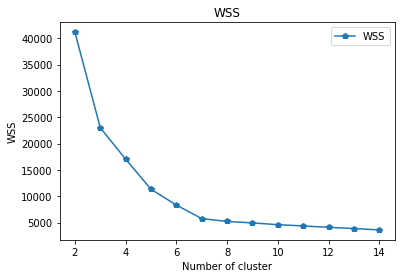

In [21]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
  
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

### Read and visualize data from Large2 Dataset¶

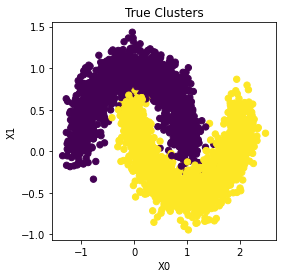

<Figure size 432x288 with 0 Axes>

In [22]:
L2_data = pd.read_csv('large2_Xydf.csv')
X=L2_data.iloc[:,1:3]
true_y=L2_data['y']
x = L2_data[['X0','X1']].to_numpy()
y = L_data['y'].to_numpy()
plot_clusters("True Clusters", x, y, 4)

### Calculate y_count

In [23]:
y_true_count=y_count(true_y)
y_true_count

{0: 1500, 1: 1500}

### Calculate True WSS

In [24]:
True_WSS=wss(X,true_y,y_true_count)
True_WSS

1917.7276232889399

### Calculate True BSS

In [25]:
True_BSS=bss(X,true_y,y_true_count)
True_BSS

1219.5688117058637

### Calculate True Total SSE

In [26]:
True_Total_SSE=total_sse(True_WSS,True_BSS)
True_Total_SSE

3137.2964349948033

***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

K=  2  WSS=  1310.218169805449  BSS=  1827.0782651893564  SSE=  3137.296434994805  Time=  0.2178110000000011
K=  3  WSS=  880.6478616772774  BSS=  2256.648573317525  SSE=  3137.2964349948024  Time=  0.3802519999999987
K=  4  WSS=  592.659847414601  BSS=  2544.6365875802026  SSE=  3137.2964349948033  Time=  0.43602599999999825


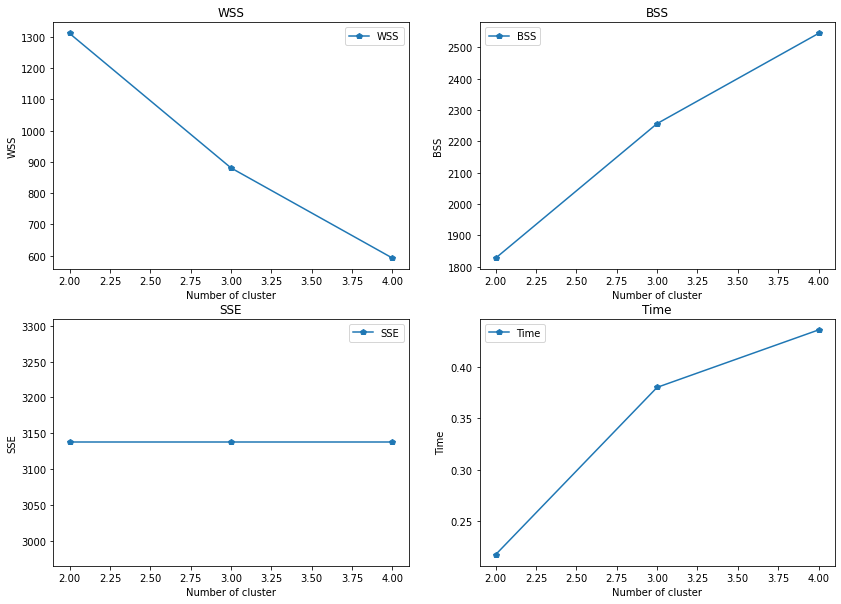

In [27]:
#Set K=2, 3, 4.
range_n_clusters = [2, 3, 4]
# record WSS for every value of K
Pred_WSS = []
# record BSS for every value of K
Pred_BSS = []
# record SSE for every value of K
Pred_SSE = []
# record running time for every value of K
Time=[]

for n_clusters in range_n_clusters:
   start= process_time() 
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   end=process_time() 
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
   #calculate BSS
   pred_bss=bss(X,y_pred,y_pred_count)
   Pred_BSS.append(pred_bss)
   #calculate SSE
   pred_sse=total_sse(pred_wss,pred_bss)
   Pred_SSE.append(pred_sse)
   #calculate running time
   pred_time=end-start
   Time.append(pred_time)
   #print WSS,BSS,SSE,Time
   print("K= ",n_clusters," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)
#Add visual
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
fig.add_subplot(222)
plt.plot(range_n_clusters, Pred_BSS,'p-',label='BSS')
plt.xlabel("Number of cluster")
plt.ylabel("BSS")
plt.title("BSS")
plt.legend()
fig.add_subplot(223)
plt.plot(range_n_clusters, Pred_SSE,'p-',label='SSE')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("SSE")
plt.legend()
fig.add_subplot(224)
plt.plot(range_n_clusters, Time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

***
## Section: 3.3 - For the K=2 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

### Create scatterplots for true cluster and the cluster produced by my algorithm

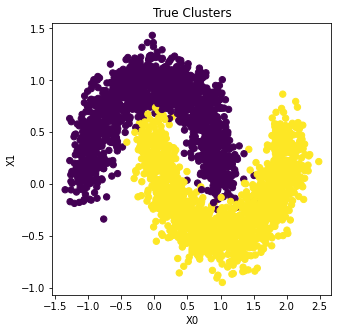

<Figure size 432x288 with 0 Axes>

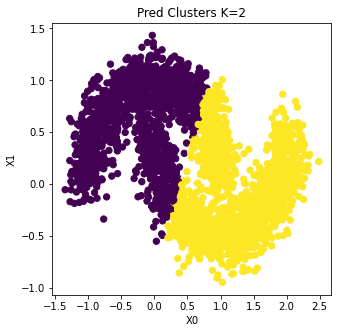

<Figure size 432x288 with 0 Axes>

In [28]:
clusterer = KMeans(n_clusters = 2, random_state=42)
y_pred = clusterer.fit_predict(X)
plot_clusters("True Clusters", x, y, 5)
plot_clusters("Pred Clusters K=2", x, y_pred, 5)

### Create a cross tabulation matrix comparing the true and assigned clusters

In [29]:
tabulation_matrix(y,y_pred)

---------------------
old confusion matrix:
 [[1119  381]
 [ 361 1139]]
accuracy: 0.75
cost matrix:
 [[ 361. 1119.]
 [1139.  381.]]
index: [(0, 0), (1, 1)]
---------------------
mapping:
map: 0 --> 0
map: 1 --> 1
---------------------
new confusion matrix:
 [[1119  381]
 [ 361 1139]]
accuracy: 0.75


### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [30]:
classification_report(y, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

'              precision    recall  f1-score   support\n\n           0       0.76      0.75      0.75      1500\n           1       0.75      0.76      0.75      1500\n\n    accuracy                           0.75      3000\n   macro avg       0.75      0.75      0.75      3000\nweighted avg       0.75      0.75      0.75      3000\n'

***
## Section: 3.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

### Observation:
>- Limitations of K-means: Non-globular Shapes


### K=6 is best
When K is at 6, WSS produces an inflection point.Overcoming Limitations of K-means: Non-globular Shapes

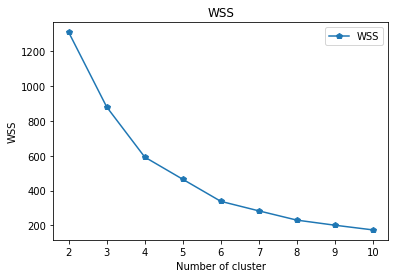

In [31]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
  
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

### Spectral Clustering
>- 1. The process does not require too many assumptions on data structure. For example, Kmeans requires data to be convex set.
>- 2. By constructing sparse Similarity graph, it can significantly outperform other algorithms in computing speed for larger data sets.
>- 3. As spectral clustering is a graph cutting process, there is no clustering of discrete clusters like kmesns clustering.
>- 4. There is no need to make assumptions about the probability distribution of data like GMM.

In [88]:
from sklearn.cluster import SpectralClustering

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the Total SSE (WSS+BSS), and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

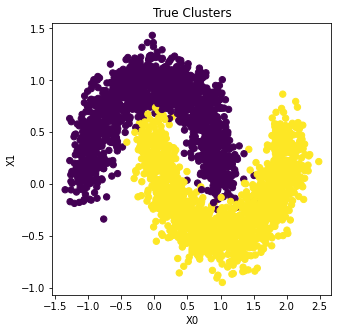

num of clusters=  2  WSS=  1315.1732388663459  BSS=  1822.1231961284611  SSE=  3137.296434994807  Time=  3.860654999999994


<Figure size 432x288 with 0 Axes>

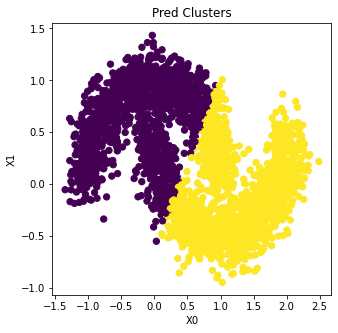

num of clusters=  3  WSS=  991.4019317392488  BSS=  2145.8945032555534  SSE=  3137.2964349948024  Time=  3.504950000000008


<Figure size 432x288 with 0 Axes>

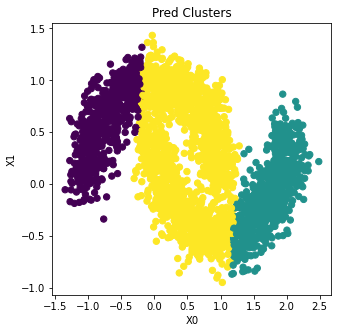

num of clusters=  4  WSS=  657.3008453726361  BSS=  2479.995589622167  SSE=  3137.296434994803  Time=  3.6371559999999903


<Figure size 432x288 with 0 Axes>

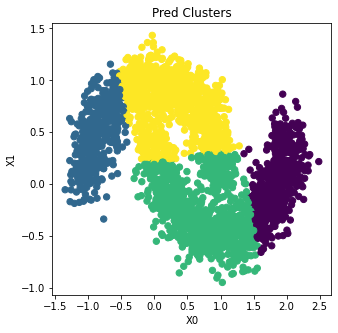

<Figure size 432x288 with 0 Axes>

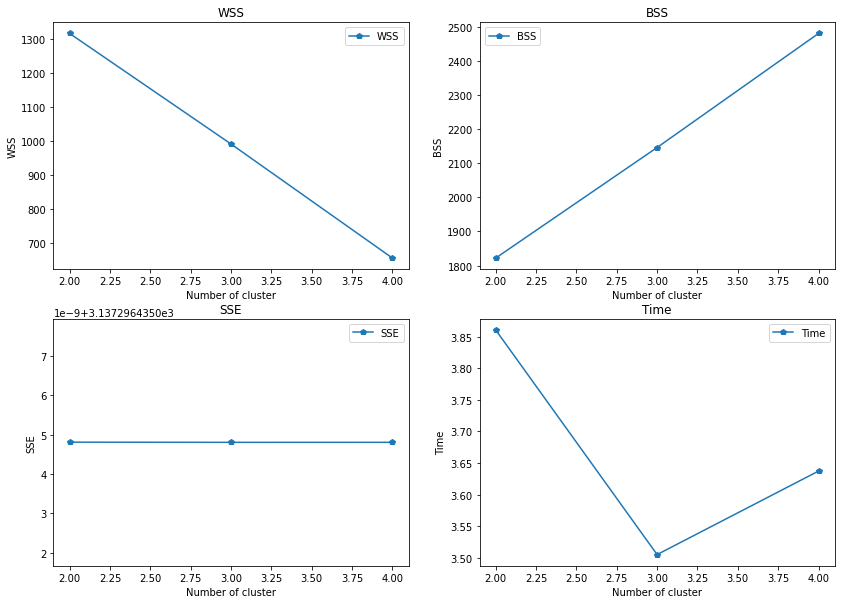

In [89]:
L2_data = pd.read_csv('large2_Xydf.csv')
X=L2_data.iloc[:,1:3]
true_y=L2_data['y']
x = L2_data[['X0','X1']].to_numpy()
y = L2_data['y'].to_numpy()
plot_clusters("True Clusters", x, y, 5)
#Set K=2, 3, 4.
range_n_clusters = [2, 3, 4]
# record WSS for every value of K
Pred_WSS = []
# record BSS for every value of K
Pred_BSS = []
# record SSE for every value of K
Pred_SSE = []
# record running time for every value of K
Time=[]

for n_clusters in range_n_clusters:
   start= process_time() 
   #iterating through cluster sizes
   clusterer = SpectralClustering(n_clusters= n_clusters)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   end=process_time() 
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
   #calculate BSS
   pred_bss=bss(X,y_pred,y_pred_count)
   Pred_BSS.append(pred_bss)
   #calculate SSE
   pred_sse=total_sse(pred_wss,pred_bss)
   Pred_SSE.append(pred_sse)
   #calculate running time
   pred_time=end-start
   Time.append(pred_time)
   #print WSS,BSS,SSE,Time
   print("num of clusters= ",n_clusters," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)
   plot_clusters("Pred Clusters", x, y_pred, 5)
#Add visual
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
fig.add_subplot(222)
plt.plot(range_n_clusters, Pred_BSS,'p-',label='BSS')
plt.xlabel("Number of cluster")
plt.ylabel("BSS")
plt.title("BSS")
plt.legend()
fig.add_subplot(223)
plt.plot(range_n_clusters, Pred_SSE,'p-',label='SSE')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("SSE")
plt.legend()
fig.add_subplot(224)
plt.plot(range_n_clusters, Time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

### Create a cross tabulation matrix comparing the true and assigned clusters

In [90]:
clusterer = SpectralClustering(n_clusters = 2)
y_pred = clusterer.fit_predict(X)
tabulation_matrix(y,y_pred)

---------------------
old confusion matrix:
 [[ 326 1174]
 [1154  346]]
accuracy: 0.22
cost matrix:
 [[1154.  326.]
 [ 346. 1174.]]
index: [(0, 1), (1, 0)]
---------------------
mapping:
map: 0 --> 1
map: 1 --> 0
---------------------
new confusion matrix:
 [[1174  326]
 [ 346 1154]]
accuracy: 0.78


### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [91]:
classification_report(y, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

'              precision    recall  f1-score   support\n\n           0       0.22      0.22      0.22      1500\n           1       0.23      0.23      0.23      1500\n\n    accuracy                           0.22      3000\n   macro avg       0.22      0.22      0.22      3000\nweighted avg       0.22      0.22      0.22      3000\n'

***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

### Observation:
>- Larger num_clusters not always produces the smaller WSS!!!!
>- Increasing num_clusters can overcoming Limitations of K-means: Non-globular Shapes

### K=4 is best
When K is at 4, WSS produces an inflection point.Overcoming Limitations of K-means: Non-globular Shapes

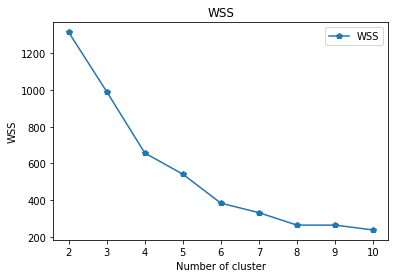

In [94]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
  
   #iterating through cluster sizes
   clusterer = SpectralClustering(n_clusters = n_clusters)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

### Agglomerative Clustering
>- One of the advantages of the algorithm is that the clustering of data sets can be displayed at different scales (levels).

In [51]:
from sklearn.cluster import AgglomerativeClustering

***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the Total SSE (WSS+BSS), and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

## Set n_clusters=2, 3, 4; Compute WSS, BSS, Total SSE (WSS+BSS), and running time; Create scatterplots

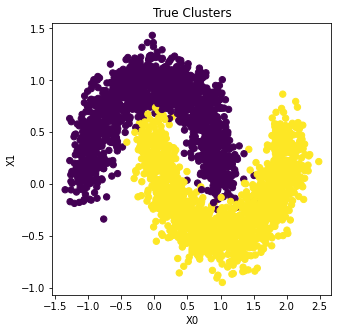

num of clusters=  2  WSS=  1378.5127780237053  BSS=  1758.7836569710983  SSE=  3137.2964349948033  Time=  0.2946019999999976


<Figure size 432x288 with 0 Axes>

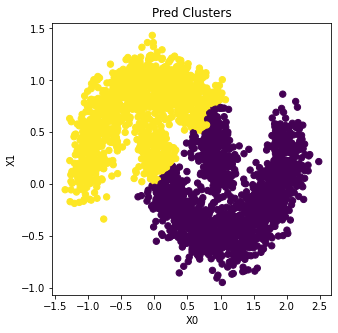

num of clusters=  3  WSS=  976.8048873880063  BSS=  2160.491547606799  SSE=  3137.296434994805  Time=  0.2953369999999893


<Figure size 432x288 with 0 Axes>

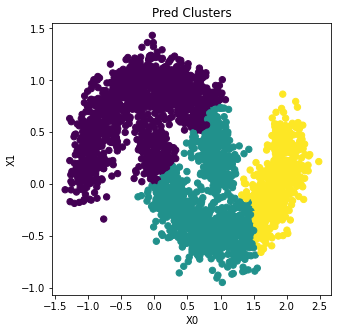

num of clusters=  4  WSS=  639.5805888494392  BSS=  2497.7158461453623  SSE=  3137.2964349948015  Time=  0.30332599999999843


<Figure size 432x288 with 0 Axes>

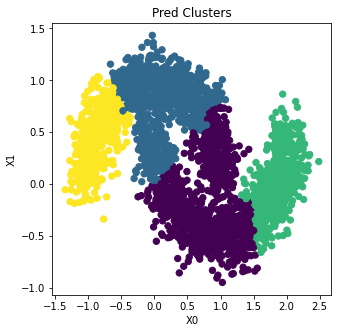

<Figure size 432x288 with 0 Axes>

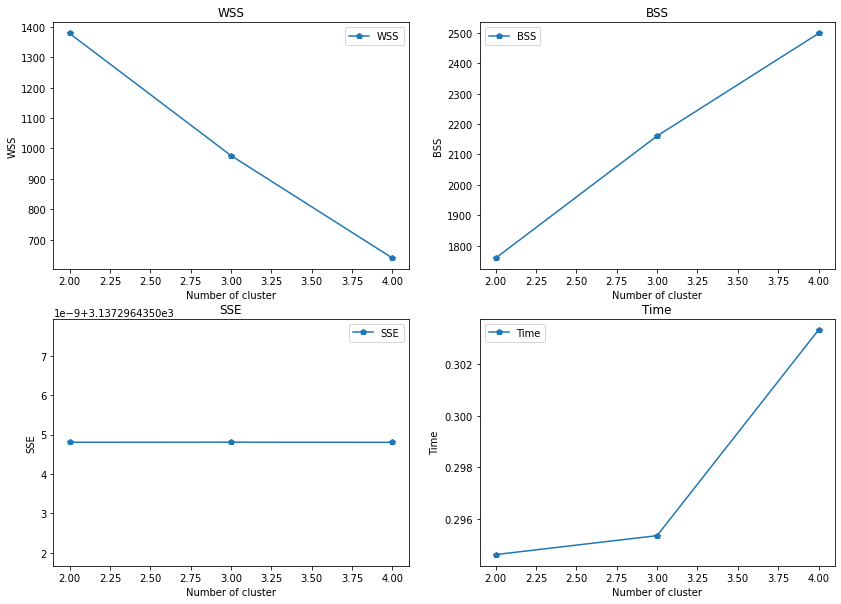

In [82]:
L2_data = pd.read_csv('large2_Xydf.csv')
X=L2_data.iloc[:,1:3]
true_y=L2_data['y']
x = L2_data[['X0','X1']].to_numpy()
y = L2_data['y'].to_numpy()
plot_clusters("True Clusters", x, y, 5)
#Set K=2, 3, 4.
range_n_clusters = [2, 3, 4]
# record WSS for every value of K
Pred_WSS = []
# record BSS for every value of K
Pred_BSS = []
# record SSE for every value of K
Pred_SSE = []
# record running time for every value of K
Time=[]

for n_clusters in range_n_clusters:
   start= process_time() 
   #iterating through cluster sizes
   clusterer = AgglomerativeClustering(n_clusters = n_clusters)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   end=process_time() 
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
   #calculate BSS
   pred_bss=bss(X,y_pred,y_pred_count)
   Pred_BSS.append(pred_bss)
   #calculate SSE
   pred_sse=total_sse(pred_wss,pred_bss)
   Pred_SSE.append(pred_sse)
   #calculate running time
   pred_time=end-start
   Time.append(pred_time)
   #print WSS,BSS,SSE,Time
   print("num of clusters= ",n_clusters," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)
   plot_clusters("Pred Clusters", x, y_pred, 5)
#Add visual
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
fig.add_subplot(222)
plt.plot(range_n_clusters, Pred_BSS,'p-',label='BSS')
plt.xlabel("Number of cluster")
plt.ylabel("BSS")
plt.title("BSS")
plt.legend()
fig.add_subplot(223)
plt.plot(range_n_clusters, Pred_SSE,'p-',label='SSE')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("SSE")
plt.legend()
fig.add_subplot(224)
plt.plot(range_n_clusters, Time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

### Create a cross tabulation matrix comparing the true and assigned clusters

In [83]:
clusterer = AgglomerativeClustering(n_clusters = 2)
y_pred = clusterer.fit_predict(X)
tabulation_matrix(y,y_pred)

---------------------
old confusion matrix:
 [[ 309 1191]
 [1296  204]]
accuracy: 0.17
cost matrix:
 [[1296.  309.]
 [ 204. 1191.]]
index: [(0, 1), (1, 0)]
---------------------
mapping:
map: 0 --> 1
map: 1 --> 0
---------------------
new confusion matrix:
 [[1191  309]
 [ 204 1296]]
accuracy: 0.83


### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [84]:
classification_report(y, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

'              precision    recall  f1-score   support\n\n           0       0.19      0.21      0.20      1500\n           1       0.15      0.14      0.14      1500\n\n    accuracy                           0.17      3000\n   macro avg       0.17      0.17      0.17      3000\nweighted avg       0.17      0.17      0.17      3000\n'

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

### Observation:
>- Total SSE is a contant.
>- The larger the num_clusters, the longer the program will run.
>- The larger num_clusters is, the smaller WSS is.
>- Increasing num_clusters can overcoming Limitations of K-means: Non-globular Shapes

### K=4 is best
When K is at 4, WSS produces an inflection point.Overcoming Limitations of K-means: Non-globular Shapes

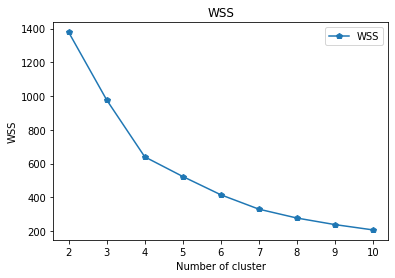

In [85]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
  
   #iterating through cluster sizes
   clusterer = AgglomerativeClustering(n_clusters = n_clusters)
   y_pred = clusterer.fit_predict(X)
   y_pred_count = y_count(y_pred)
   #calculate WSS
   pred_wss=wss(X,y_pred,y_pred_count)
   Pred_WSS.append(pred_wss)
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

### Relative performance and performance versus the true clustering

### 
>- Qulity: Agglomerative(wss:1378)> Spectral(wss:1315)> KMeans(wss:1310)
>- Time:Spectral(3.9s)> Agglomerative(0.3s)> KMeans(0.21s)
>- Performance versus the true clustering: Agglomerative(0.83)> Spectral(0.78)> KMeans(0.75)

### What characteristics of the data might impact the clustering algorithms' performance?

### 
>- Size:
Each category in the three datasets is similar in size, so the classification works well. If the category sizes are not similar, the effect will be different.
>- Density: 
Each category in the three datasets is similar in density, so the classification works well. If the category density are not similar, the effect will be different.
>- Non-globular Shapes: 
The clustering effect of the third data set is not very good due to the Non-globular Shapes.

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

### 
>- I think K-means is the Best: 
>-Simple and fast , which is one of the important reasons why k-means is used most in the industry. 
>-You only need to change k when you call a parameter. And the choice of k is easy.
>-The principle of the algorithm is simple and explicable.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

### 
>- I learned the realization of three clustering methods and understood the meaning of each parameter.
>- I learned how to calculate WSS, BSS and SSE methods, as well as calculate program running time.
>- I understand that different characteristics of data will affect the clustering effect.
>- I learned how to evaluate the clustering effect by comparing it with standard clustering.

***
### END-OF-SUBMISSION
***